# HIV Risk Predictive Model

# 1.0 Project Overview
# 1.1 Introduction

According to HIV & AIDS world outlook reports highlights HIV as the biggest global health issue with approximately 38 million infected worldwide(WHO(2020), UNAIDS(2020)).The disease mostly affects adolescent girls and young women (AGYW), who are at a higher risk of HIV infection due to a combination of biological, socio-economic, and behavioral factors (WHO(2020), UNAIDS(2019)).

Regionally, sub-Saharan Africa is bearing the bulk of the epidemic and bears nearly 70% of the world's HIV cases (WHO(2020), UNAIDS(2019)).

Locally in Kenya, HIV remains a significant public health issue among AGYW relative to their counterparts who are male. Structural impediments such as gender disparities, levels of poverty, and limited access to education and health care leave AGYW in some of the counties vulnerable to increased vulnerability (National AIDS Control Council, 2020; Ministry of Health Kenya, 2021). Despite interventions such as the Aid-Funded programs that seek to stem HIV infections by surmounting these structural drivers, the challenge of reaching high-risk groups and utilizing existing resources to the fullest for intervention still exists.This research will, therefore adopt Cross Industry Standard Procedures- Data Mining(CRISP-DM) methodology for the health industry.


# 2.0 Business Understanding

Health risks like the Human Immunodeficiency Virus (HIV) is still a major public health problem among adolescent girls and young women (AGYW) in Kenya. AGYW still carry an unbalanced burden of HIV despite the universal national and global campaigns, including the DREAMS program (Determined, Resilient, Empowered, AIDS-Free, Mentored, and Safe). AGYW have a greater risk of HIV infection than their male counterparts because of a mix of biological, socio-economic, and behavioral determinants(WHO(2020); https://www.who.int/news-room/fact-sheets/detail/adolescents-health-risks-and-solutions, UNAIDS(2019); https://www.unaids.org/sites/default/files/media_asset/2019-global-AIDS-update_en.pdf).

In Kenya, counties vary in their socio-economic, cultural, and health environments. These are the determinants of HIV vulnerability, access to care, and success of interventions. Even with focused interventions, identifying those most vulnerable and effectively allocating resources to prevent infections is a challenge.

The overall goal of this project is to establish a predictive model to assess HIV risk among AGYW based collected data from select counties. This model, data first problem, will identify individuals who are most at risk of acquiring HIV. The final model will help stakeholders to scale up to cover more counties, channel interventions more effectively and allocate funds more appropriately to those most at risk so that new HIV infection cases can be minimized in these societies.

# 3.0 Data Understanding

## 3.1 Data Description
The dataset used in this project contains detailed demographic, behavioral, and intervention-related information on adolescent girls and young women (AGYW) participating in the DREAMS program. The data includes key indicators such as:

Demographic Information – Age, county, household structure, parental status.
Socioeconomic Status – Household size, food security, income sources.
Education & Behavior – School attendance, history of sexual activity, condom use.
HIV Testing & Status – HIV testing history, last test result.
DREAMS Program Participation – Interventions received (biomedical, behavioral, social protection).
Exit Status – Whether participants continued or exited the program and the reason for exiting.
This dataset provides a comprehensive view of factors affecting HIV risk among AGYW, allowing for predictive modeling and impact evaluation.

## 3.2 Data Source
The data is sourced from health related data records of aid-funded program (PEPFAR DREAMS program) in kenya on select counties.

## 3.3 Data loading and preview

In [104]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import summarytools as st
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [105]:
#Loading the dreams dataset
df = pd.read_csv('./data/hiv_raw_dataset.csv')

### Preview dataset

In [106]:
#Preview first five rows
df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


### Shape of the dataset

In [107]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 455807 rows and 42 columns


In [108]:
df.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [109]:
df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN


In [110]:
df['result'].value_counts()

result
Negative    454788
Positive      1019
Name: count, dtype: int64

## 3.4 Problem Statement


Kenyan adolescent girls and young women (AGYW) continue to be at increased risk of HIV infection due to both socio-economic, behavioral, and biological factors. Despite interventions from the government and other aid-funded programs, there is still a critical challenge in being able to identify with precision those at greatest risk and implementing interventions in the most targeted and effective manner. This study strives to develop a predictive model of the HIV risk of AGYW in selected Kenyan counties based on a range of demographic, socio-economic, and behavioral data. By following a data-first strategy, this research aspires to better understand drivers of HIV vulnerability and to maximize resource effectiveness for prevention. The analysis will use current data from AGYW to determine patterns and correlations that may be used to create more effective intervention approaches.

## 3.4.1 Objective:
The overall objective of this study is to create a prediction model that assesses the HIV risk among AGYW in Kenya, using health related data from focused counties.

## 3.4.2 Research Questions

1. What demographic characteristics of AGYW are most closely associated with HIV risk?

    a. What is the AGYW age distribution at enrollment?

    b. What is the distribution of AGYW enrolled schooling status?


2. What are demographic, geographic factors and socioeconomic status influence HIV risk for AGYW? 

    a. What effects do socioeconomic factors like food insecurity have on HIV vulnerability?

    b. hat is the distribution AGYW enrolled in different counties and their HIV test results?

    c. What is the distribution AGYW enrolled with positive HIV test results per age?

3. What are the combined effects of a number of different factors (e.g., socio-economic, demographic, behavioral) on risk of HIV infection?
 a. How do number of people in the household, sexual behavior, and biomedical interventions affect HIV risk together?
 b. Which are the most relevant factors or sets of factors in association with HIV vulnerability?
 c. Which variables have maximum prediction power for determining HIV risk (outcome)?


## 3.5 Metrics of Success

# 4.0 Data Preparation

## 4.1 Data Cleaning

This involves checking on data validity, accuracy, completeness, accuracy, consistency and uniformity. These will be carried out on the select datasets that are within the scope of reasearch.

### 4.1.1 Data completeness; Checking for missing values


In [111]:
df.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [112]:
missing_values_in_percentage = (df.isna().sum()/ len(df)*100).sort_values(ascending=False)
print(f"Missing values in percentage for each column : \n{missing_values_in_percentage}")

Missing values in percentage for each column : 
head_of_household_other              98.692429
dreams_program_other                 98.561233
exit_reason_other                    94.362087
dreams_program                       89.807309
used_condom_with_last_partner        53.442575
age_of_last_partner                  53.372370
age_at_first_sexual_encounter        50.361447
has_sexual_partner                   50.351574
current_school_level                 44.068213
no_of_days_missed_food_in_4wks       43.668482
current_income_source                28.425189
exit_reason                          15.326882
exit_age                             15.080725
parents_alive_status                 14.349056
age_of_household_head                 4.611162
father_alive                          2.941596
mother_alive                          2.849232
head_of_household                     2.109445
county                                2.030684
no_of_children                        1.705327
ever_had_sex

### Observations;
* Some columns has significantly high percentage of missing values; above 80%, dropping these features may not be impactful

In [113]:
#Drop features with above 80% of missing values
df = df.drop(['head_of_household_other','dreams_program_other','exit_reason_other','dreams_program'], axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   age_of_household_head              434789 non-null  float64
 5   father_alive                       442399 non-null  object 
 6   mother_alive                       442820 non-null  object 
 7   are_both_parents_alive             455807 non-null  object 
 8   is_one_parent_alive                455807 non-null  object 
 9   parents_alive_status               390403 non-null  object 
 10  no_of_people_in_household          448607 non-null  float64
 11  no_of_females                      4484

In [115]:
# function to fill missing values with median for numerical features and mode for categorical features
def impute(df):
    # numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        df[feature] = df[feature].fillna(df[feature].median())
    
    # categorical features
    cat_features = df.select_dtypes(include=[object]).columns
    for feature in cat_features:
        df[feature] = df[feature].fillna(df[feature].mode()[0]) 
    
    return df

# fill missing values usng the function
df_imputed = impute(df)

In [116]:
# Check imputed dataset info
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455807 non-null  object 
 2   county                             455807 non-null  object 
 3   head_of_household                  455807 non-null  object 
 4   age_of_household_head              455807 non-null  float64
 5   father_alive                       455807 non-null  object 
 6   mother_alive                       455807 non-null  object 
 7   are_both_parents_alive             455807 non-null  object 
 8   is_one_parent_alive                455807 non-null  object 
 9   parents_alive_status               455807 non-null  object 
 10  no_of_people_in_household          455807 non-null  float64
 11  no_of_females                      4558

### 4.1.2  Validity check

Checking irrelevant features and removing them; feature selection

In [117]:
df_imputed.head()

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,parents_alive_status,...,exit_reason,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age
0,9/16/2004,2/22/2020,Nairobi,Mother,58.0,Yes,Yes,Yes,No,Both,...,Graduation,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,20.0
1,8/2/2004,12/18/2019,Nairobi,Father,43.0,Yes,Yes,Yes,No,Both,...,Graduation,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,20.0
2,10/20/2005,3/7/2020,Nairobi,Mother,41.0,No,Yes,No,Yes,One,...,Graduation,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,20.0
3,1/18/2006,3/3/2020,Nairobi,Mother,45.0,No,Yes,No,Yes,One,...,Graduation,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,20.0
4,3/22/2004,12/18/2019,Nairobi,Father,42.0,Yes,Yes,Yes,No,Both,...,Graduation,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,20.0


In [118]:
df_imputed.shape

(455807, 38)

In [119]:
df_imputed.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
       'no_of_people_in_household', 'no_of_females', 'no_of_males',
       'no_of_adults', 'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'ever_tested_for_hiv',
       'last_test_result', 'ever_had_sex', 'age_at_first_sexual_encounter',
       'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age'],
      dtype='object')

### Observations
* Exit_status, exit_reason and exit age may not be predisposing or mitigating factors to HIV risk among AGYW enrolled in the program
* Hence, dropping may not have negative impact on the dataset.

In [120]:
df_imputed = df_imputed.drop(['is_one_parent_alive',
                              'parents_alive_status',
                              'no_of_females',
                              'no_of_males',
                              'ever_tested_for_hiv', 
                              'intervention_name',
                              'intervention_date',
                              'exit_age', 
                              ], axis=1)
df_imputed.head()

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_adults,...,age_of_last_partner,used_condom_with_last_partner,exit_status,exit_reason,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions
0,9/16/2004,2/22/2020,Nairobi,Mother,58.0,Yes,Yes,Yes,6.0,2.0,...,Older,Sometimes,No,Graduation,Negative,1,1,1,0,0
1,8/2/2004,12/18/2019,Nairobi,Father,43.0,Yes,Yes,Yes,6.0,2.0,...,Older,Sometimes,No,Graduation,Negative,1,1,1,0,0
2,10/20/2005,3/7/2020,Nairobi,Mother,41.0,No,Yes,No,5.0,2.0,...,Older,Sometimes,No,Graduation,Negative,1,1,0,0,0
3,1/18/2006,3/3/2020,Nairobi,Mother,45.0,No,Yes,No,5.0,1.0,...,Older,Sometimes,No,Graduation,Negative,1,1,1,0,0
4,3/22/2004,12/18/2019,Nairobi,Father,42.0,Yes,Yes,Yes,5.0,3.0,...,Older,Sometimes,No,Graduation,Negative,1,1,1,0,0


In [121]:
df_imputed.shape

(455807, 30)

In [122]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,455807.0,1980.867203,1.080943e+06,-48.0,34.0,42.0,50.0,727284575.0
no_of_people_in_household,455807.0,5.778117,3.806897e+00,0.0,4.0,6.0,7.0,356.0
no_of_adults,455807.0,2.484201,1.286409e+00,0.0,2.0,2.0,3.0,77.0
no_of_children,455807.0,3.278287,3.403991e+00,0.0,2.0,3.0,4.0,328.0
age_at_first_sexual_encounter,455807.0,16.891472,1.478979e+01,0.0,17.0,17.0,17.0,4118.0
bio_medical,455807.0,0.990619,9.640113e-02,0.0,1.0,1.0,1.0,1.0
social_protection,455807.0,0.988105,1.084155e-01,0.0,1.0,1.0,1.0,1.0
behavioral,455807.0,0.882301,3.222517e-01,0.0,1.0,1.0,1.0,1.0
post_gbv_care,455807.0,0.193387,3.949539e-01,0.0,0.0,0.0,0.0,1.0
other_interventions,455807.0,0.061107,2.395267e-01,0.0,0.0,0.0,0.0,1.0


In [123]:
df_imputed['age_at_first_sexual_encounter'].value_counts().sort_values(ascending=False).head(20)

age_at_first_sexual_encounter
17.0    265921
18.0     40841
16.0     35638
15.0     35195
19.0     20018
14.0     17908
20.0     15189
13.0      8176
12.0      4837
21.0      4348
22.0      2219
1.0       1437
10.0      1127
11.0       851
23.0       763
9.0        258
2.0        192
24.0       138
8.0        132
7.0         81
Name: count, dtype: int64

### The age of the household could not be a negative age, ideally would be from the age of youngest AGYW enrolled and the oldest at 120 years maximum for grandparents being head of the household

In [131]:
df_1 = df_imputed#[(df_imputed['age_of_household_head'] > 9) & (df_imputed['age_of_household_head'] < 120)]

In [132]:
df_1.shape

(455807, 30)

In [133]:
df_1['age_of_household_head'].max()

727284575.0

### 4.1.3 Data accuracy
Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

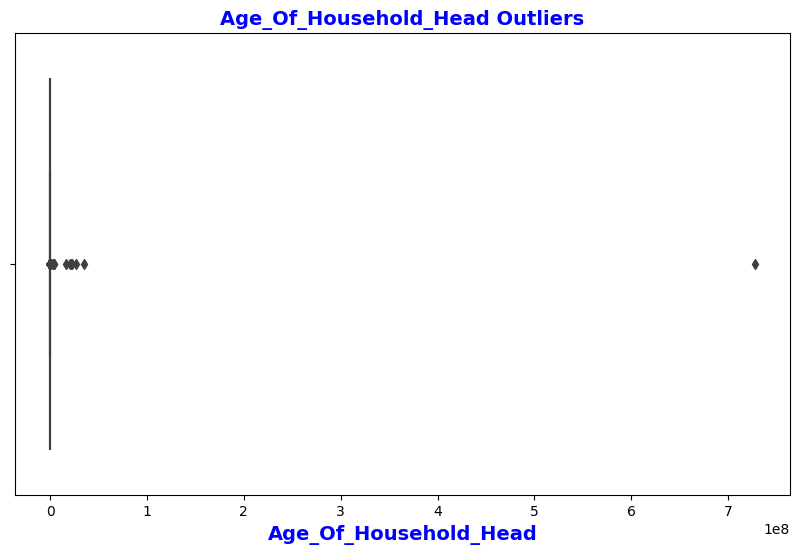

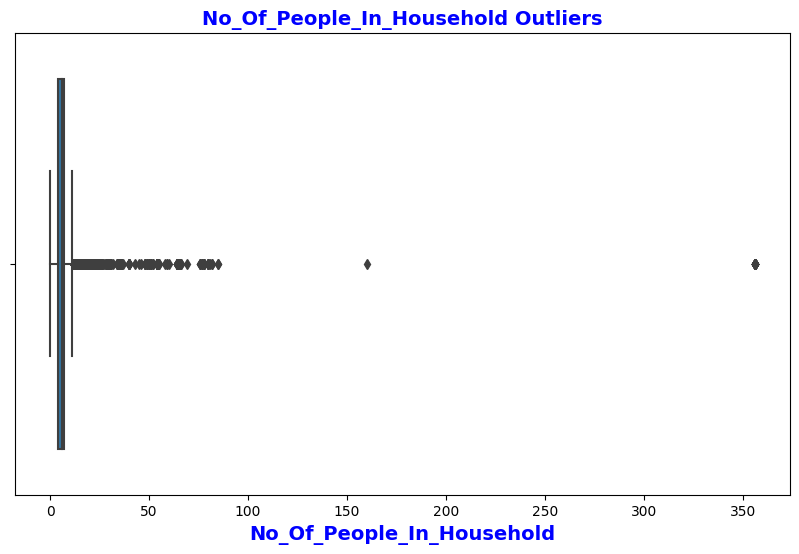

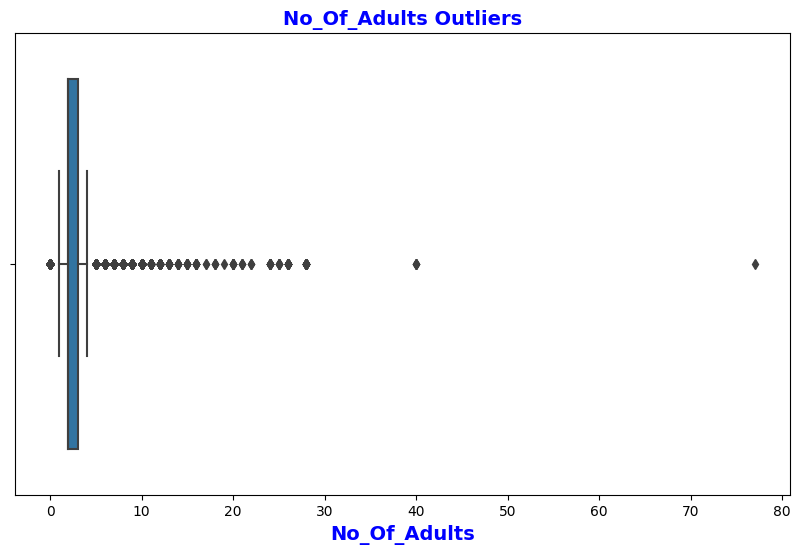

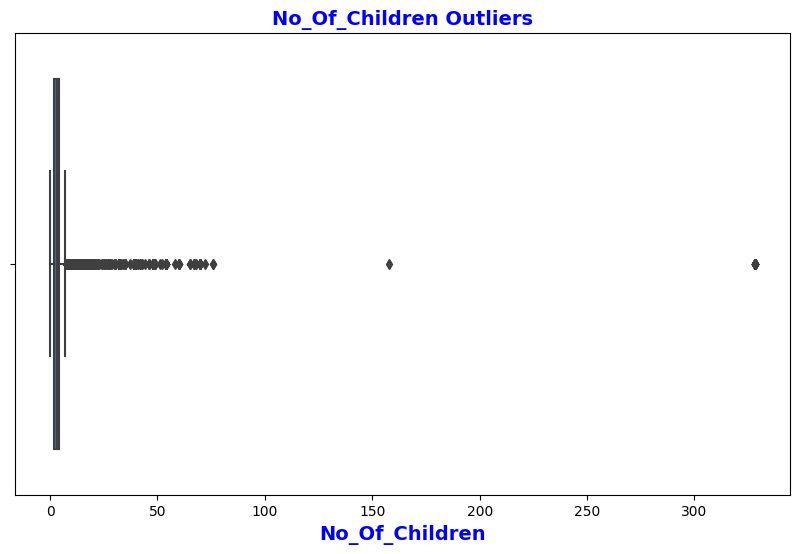

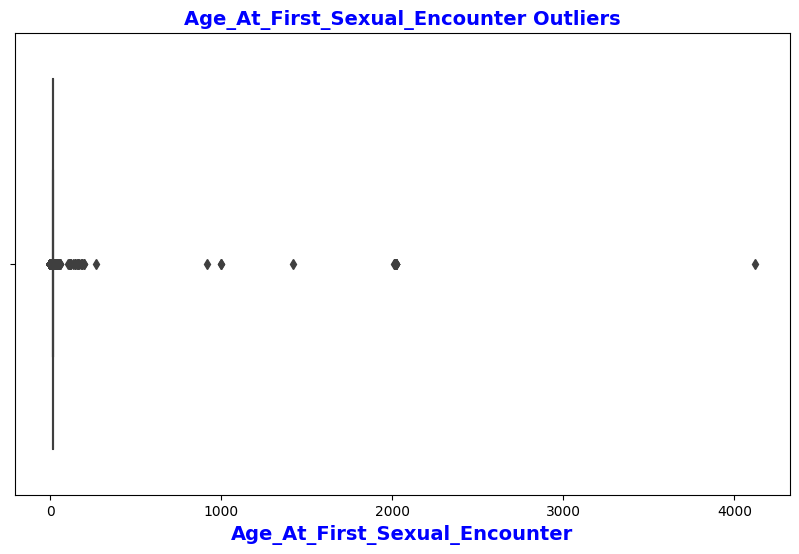

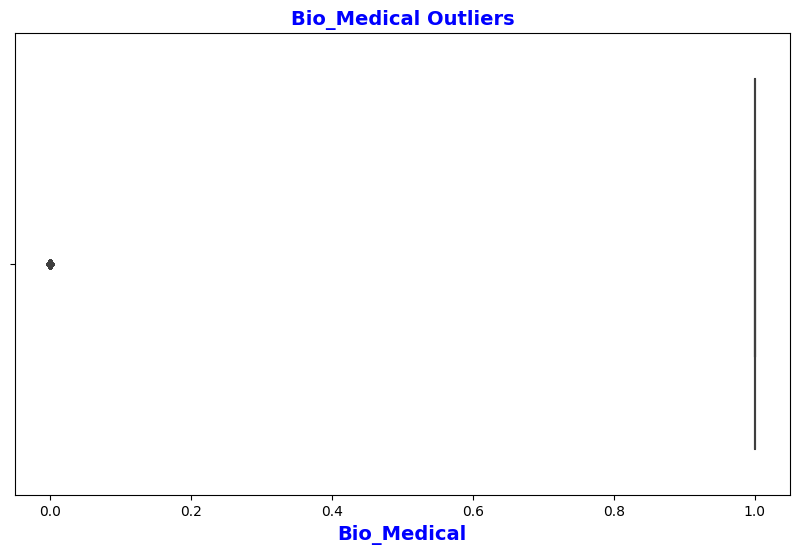

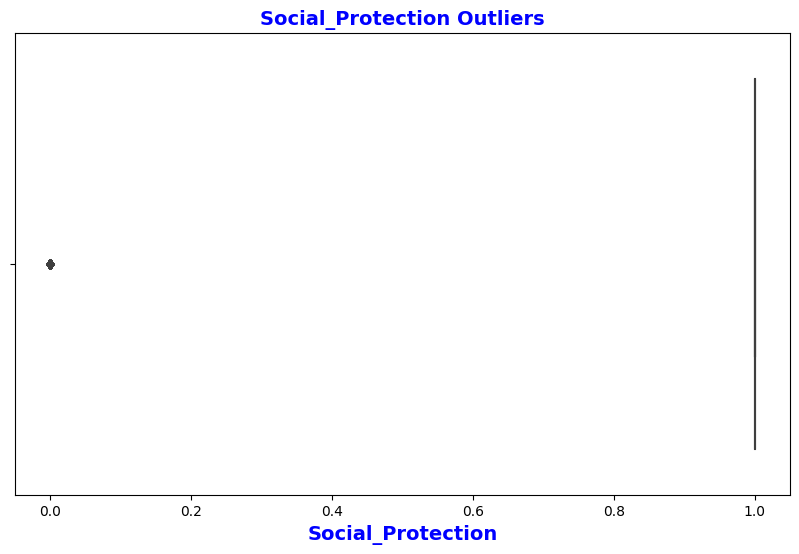

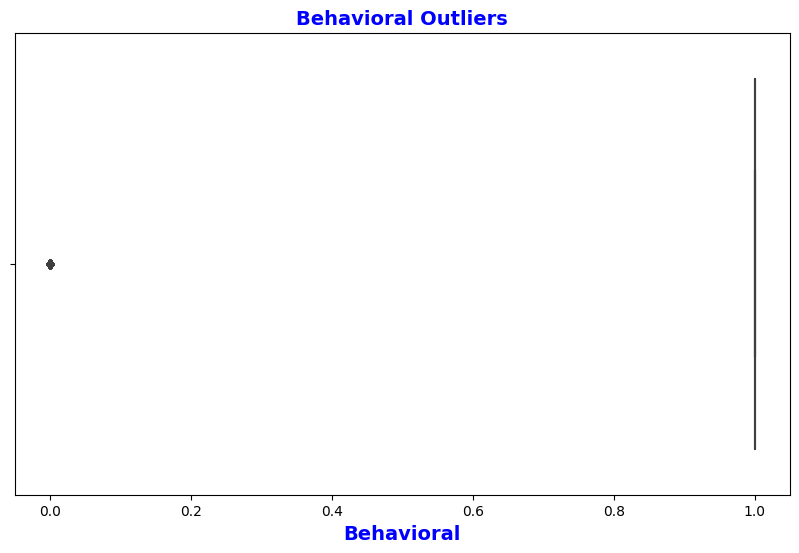

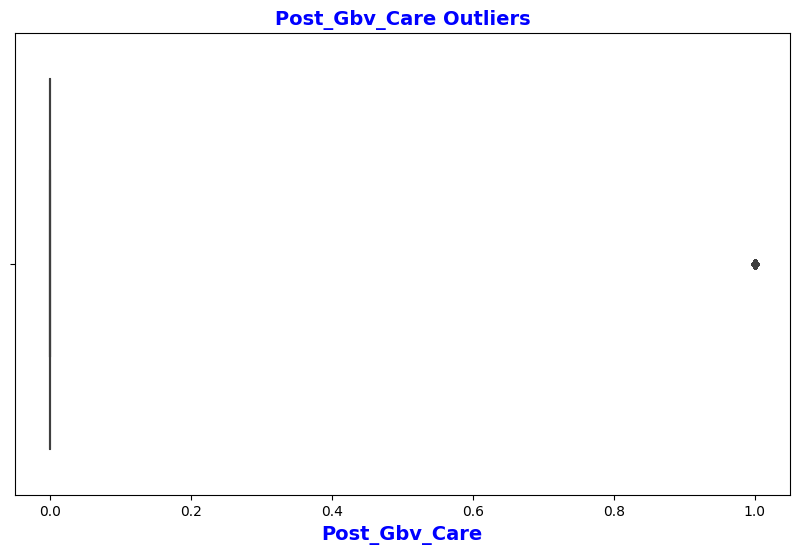

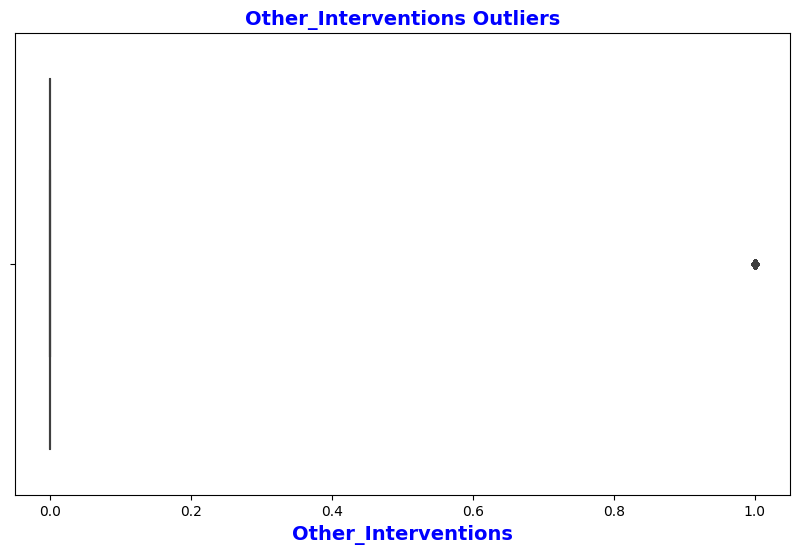

In [134]:
# Check for outliers using boxplot visuals
numerical_features = df_1.select_dtypes(include=['number']).columns

# Loop through each numerical feature to create a boxplot
for feature in numerical_features:
    plt.figure(figsize = (10, 6))
    
    # Create the boxplot for the feature
    sns.boxplot(x = df_1[feature])

    # Set the title and axis labels
    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    
    # Show the plot
    plt.show()


### Filter outliers and replace with median value

In [136]:
#Function to filter outliers in select features  and replace with median except those with boolen values(0 and 1)
def filter_outliers(df):
    # List of columns to filter outliers
    columns_to_filter = ['no_of_people_in_household', 
                         'no_of_adults', 
                         'no_of_children',
                         'age_of_household_head']

    for column in columns_to_filter:

        if column in df.columns:

            #calculate quantiles(1st and 3rd) and interquarterly range
            Q1 = np.quantile(df[column], 0.25)
            Q3 = np.quantile(df[column], 0.75)
            IQR = Q3 - Q1
            #Lower and upper limits
            lower_limit = Q1 - 1.5*IQR
            upper_limit = Q3 + 1.5*IQR

            #Meadian value
            median_value = df[column].median()

            #Replace outliers
            df[column] = df[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)

    return df

In [137]:
filtered_df = filter_outliers(df_1)

In [138]:
# Age at first sexual encounter values recorded as mixture of age and year
#Since values recorded as year are few, replacing them with median age
median_age = filtered_df['age_at_first_sexual_encounter'].median()

# Replace values greater than 25 with the median
filtered_df.loc[filtered_df['age_at_first_sexual_encounter'] > 25, 'age_at_first_sexual_encounter'] = median_age

In [139]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,455807.0,42.023297,11.618914,10.0,34.0,42.0,50.0,74.0
no_of_people_in_household,455807.0,5.600708,2.104048,0.0,4.0,6.0,7.0,11.0
no_of_adults,455807.0,2.230677,0.790926,1.0,2.0,2.0,3.0,4.0
no_of_children,455807.0,3.052836,1.718713,0.0,2.0,3.0,4.0,7.0
age_at_first_sexual_encounter,455807.0,16.775442,1.853132,0.0,17.0,17.0,17.0,25.0
bio_medical,455807.0,0.990619,0.096401,0.0,1.0,1.0,1.0,1.0
social_protection,455807.0,0.988105,0.108415,0.0,1.0,1.0,1.0,1.0
behavioral,455807.0,0.882301,0.322252,0.0,1.0,1.0,1.0,1.0
post_gbv_care,455807.0,0.193387,0.394954,0.0,0.0,0.0,0.0,1.0
other_interventions,455807.0,0.061107,0.239527,0.0,0.0,0.0,0.0,1.0


### Visualize filtered dataframe numerical features

In [29]:
# # Check for outliers using boxplot visuals
# numerical_features = filtered_df.select_dtypes(include=['number']).columns

# # Loop through each numerical feature to create a boxplot
# for feature in numerical_features:
#     plt.figure(figsize = (10, 6))
    
#     # Create the boxplot for the feature
#     sns.boxplot(x = filtered_df[feature])

#     # Set the title and axis labels
#     plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
#     plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    
#     # Show the plot
#     plt.show()

### 4.1.4 Data consistency
Consistency is achieved through removal of duplicates in the dataframe

In [140]:
#Check for duplicates
print(f'There are total of {filtered_df.duplicated().sum()} duplicates in the filtered dataframe')

There are total of 352 duplicates in the filtered dataframe


In [141]:
#Drop duplicates
filtered_df = filtered_df.drop_duplicates()

In [142]:
filtered_df.duplicated().sum()

0

In [143]:
filtered_df.shape

(455455, 30)

### 4.1.5 Data Uniformity
Involves feature engineering

Feature engineer age at enrollment

In [144]:
#Calculate age at enrollment
from datetime import datetime
filtered_df['date_of_birth'] = pd.to_datetime(filtered_df['date_of_birth'])
filtered_df['date_of_enrollment'] = pd.to_datetime(filtered_df['date_of_enrollment'])
filtered_df['age_at_enrollment'] = (filtered_df['date_of_enrollment'] - filtered_df['date_of_birth']).dt.days // 365

### Uniformity of column names

In [145]:
#Remove white spaces in column names and change to lower case
filtered_df.columns = filtered_df.columns.str.strip().str.lower().str.replace(" ", "_")

In [146]:
filtered_df.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner', 'exit_status',
       'exit_reason', 'result', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions',
       'age_at_enrollment'],
      dtype='object')

In [154]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455455 entries, 0 to 455806
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date_of_birth                      455455 non-null  datetime64[ns]
 1   date_of_enrollment                 455455 non-null  datetime64[ns]
 2   county                             455455 non-null  object        
 3   head_of_household                  455455 non-null  object        
 4   age_of_household_head              455455 non-null  float64       
 5   father_alive                       455455 non-null  object        
 6   mother_alive                       455455 non-null  object        
 7   are_both_parents_alive             455455 non-null  object        
 8   no_of_people_in_household          455455 non-null  float64       
 9   no_of_adults                       455455 non-null  float64       
 10  no_of_children           

### 4.1.6 Save clean dataset

In [155]:
#Save copy of cleaned dataset
clean_df = filtered_df.copy()

In [156]:
clean_df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,no_of_people_in_household,no_of_adults,...,used_condom_with_last_partner,exit_status,exit_reason,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,age_at_enrollment
0,2004-09-16,2020-02-22,Nairobi,Mother,58.0,Yes,Yes,Yes,6.0,2.0,...,Sometimes,No,Graduation,Negative,1,1,1,0,0,15
1,2004-08-02,2019-12-18,Nairobi,Father,43.0,Yes,Yes,Yes,6.0,2.0,...,Sometimes,No,Graduation,Negative,1,1,1,0,0,15
2,2005-10-20,2020-03-07,Nairobi,Mother,41.0,No,Yes,No,5.0,2.0,...,Sometimes,No,Graduation,Negative,1,1,0,0,0,14
3,2006-01-18,2020-03-03,Nairobi,Mother,45.0,No,Yes,No,5.0,1.0,...,Sometimes,No,Graduation,Negative,1,1,1,0,0,14
4,2004-03-22,2019-12-18,Nairobi,Father,42.0,Yes,Yes,Yes,5.0,3.0,...,Sometimes,No,Graduation,Negative,1,1,1,0,0,15


# 5.0 Exploratory Data Analysis(EDA)
This is the process of analyzing data to reveal trends and patterns, detect anomalies, test hypotheses and check assumptions using visuals and summary statistics.Turkey,J.W(1977)

Key goals of EDA include:

Understanding the data: Getting a sense of the data's distribution, range, and central tendencies. Identifying patterns: Discovering trends, correlations, or anomalies within the data. Checking assumptions: Verifying assumptions made about the data before further analysis or modeling. Generating hypotheses: Developing potential explanations or questions based on the findings.

## 5.1 Univariate Analysis


### 1. What demographic characteristics of AGYW are most closely associated with HIV risk?

a. **What is the AGYW age distribution at enrollment?**

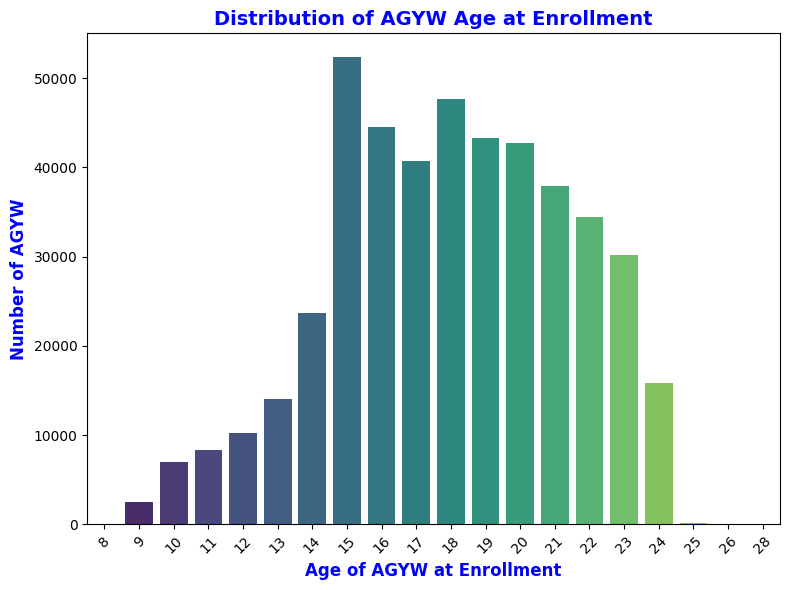

In [157]:
#Distribution of AGYW Age
plt.figure(figsize=(8, 6)) 
sns.countplot(x='age_at_enrollment', data=clean_df, palette='viridis')

plt.title('Distribution of AGYW Age at Enrollment', size=14, color='blue', weight='bold')
plt.xlabel('Age of AGYW at Enrollment', size=12, color='blue', weight='bold')
plt.ylabel('Number of AGYW', size=12, color='blue', weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1(a). **Observation**
* Most adolescent girls and young women faced with HIV risk were enrolled at the age bracket of 14-23years.

1(b). **What is the distribution of AGYW enrolled schooling status?**

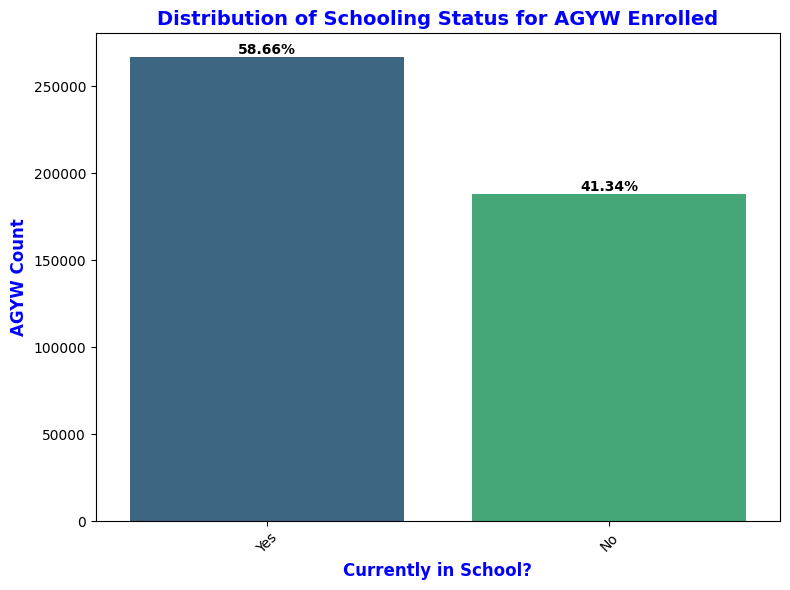

In [158]:
#Distribution of  AGYW enrolled per their current schooling status
#Setting figsize
plt.figure(figsize=(8, 6))
#Count plot
ax = sns.countplot(data= clean_df, x='currently_in_school', palette='viridis')

#Percentages in each bar
for p in ax.patches:
    height = p.get_height()
    percentage = (height / (len(clean_df))) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{percentage:.2f}%', 
            ha='center', va='bottom', size=10, color='black', weight='bold')
#Setting title and labels
plt.title("Distribution of Schooling Status for AGYW Enrolled", size=14, color='blue', weight='bold')
plt.xlabel("Currently in School?", size=12, color='blue', weight='bold')
plt.ylabel("AGYW Count", size=12, color='blue', weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1 (b). **Observation**
* During enrollment of adolescent girls and young women faced with HIV risk, 58.67%  were school going whereas 41.33% were not.

## 5.2 Bivariate Analysis

### 2. What are demographic, geographic factors and socioeconomic status influence HIV risk for AGYW? 

2(a). **What effects do socioeconomic factors like food insecurity have on HIV vulnerability?**

* Visualization of food inadequacy and HIV vulnerability


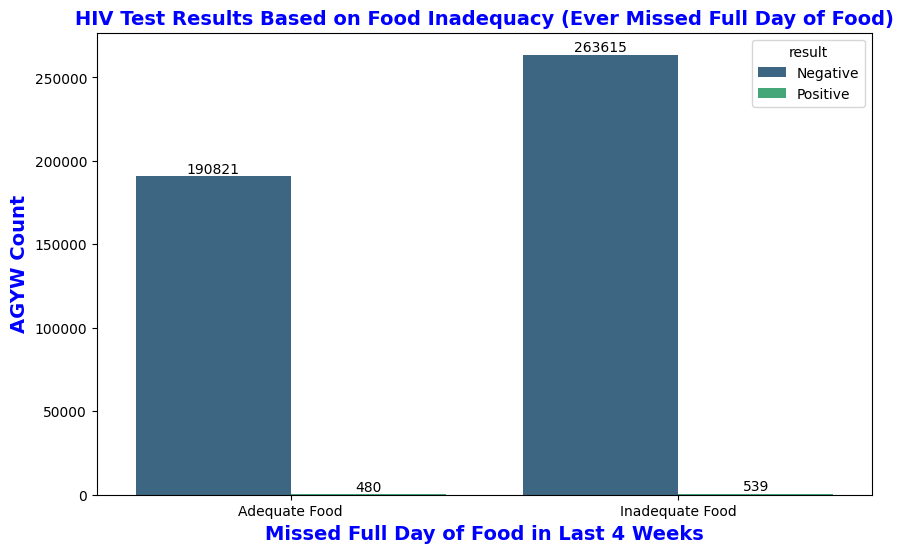

In [159]:
# Fig size
plt.figure(figsize=(10, 6))

# Countplot
ax = sns.countplot(x='ever_missed_full_day_food_in_4wks', hue='result', data=clean_df, palette='viridis')

# Setting title and labels
plt.title('HIV Test Results Based on Food Inadequacy (Ever Missed Full Day of Food)', size=14, color='blue', weight='bold')
plt.xlabel('Missed Full Day of Food in Last 4 Weeks', size=14, color='blue', weight='bold')
plt.ylabel('AGYW Count', size=14, color='blue', weight='bold')
plt.xticks([0, 1], ['Adequate Food', 'Inadequate Food'])  

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                size=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

2 (a). **Observation**

* Generally among the AGYW enrolled majority suffered food inadequacy(having missed food in th last 4 weeks)

* Those AGYWs with insufficient food recorded elevated numbers of positive HIV results.

* Drill down on statistical significance could give more insights

In [160]:
# Chi2 Test for food inadequacy and HIV test results
# Contingency table
contingency_table = pd.crosstab(clean_df['ever_missed_full_day_food_in_4wks'], clean_df['result'])
# Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

chi2_test = round(chi2, 2)
p_value_test = round(p_value, 4)

# Print contingency table and p-value
print("Contingency Table:\n", contingency_table)
print("\nChi-square test statistic:", chi2_test)
print("p-value:", p_value_test)

# p-value test
if p_value < 0.05:
    print("\nThere is a statistical significance between food inadequacy and HIV test result (p < 0.05).")
else:
    print("\nThere is no statistical significance between food inadequacy and HIV test result (p >= 0.05).")

Contingency Table:
 result                             Negative  Positive
ever_missed_full_day_food_in_4wks                    
No                                   190821       480
Yes                                  263615       539

Chi-square test statistic: 10.71
p-value: 0.0011

There is a statistical significance between food inadequacy and HIV test result (p < 0.05).


**Insight**

* There is a strong evidence that food inadequacy correlates with HIV test results among AGYWs.

2(b). **What is the distribution AGYW enrolled in different counties and their HIV test results?**

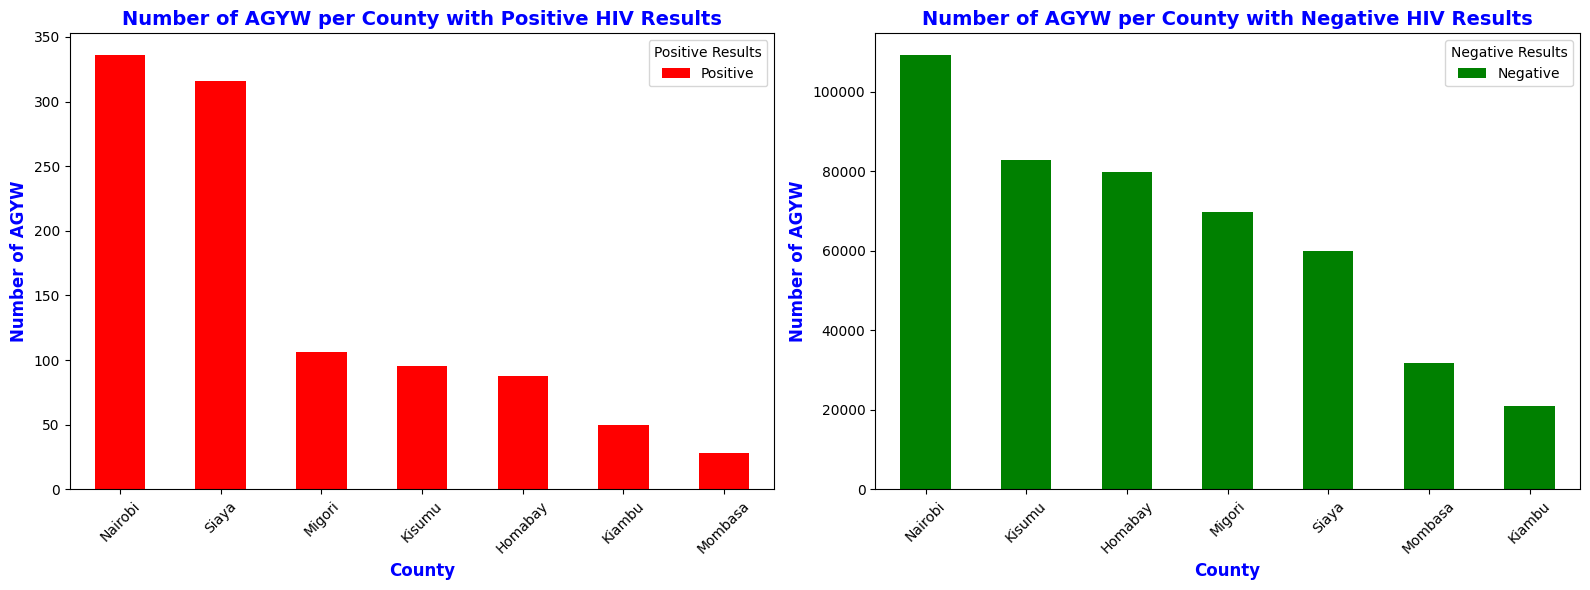

In [161]:

#AGYW distributions per county
agyw_per_county = pd.crosstab(clean_df['county'], clean_df['result'])

#Visualize as per HIV test result
# Set up side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#AGYW per county with positive HIV result
agyw_per_county['Positive'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], color='red')
ax[0].set_title('Number of AGYW per County with Positive HIV Results', size=14, color='blue', weight='bold')
ax[0].set_xlabel('County', size=12, color='blue', weight='bold')
ax[0].set_ylabel('Number of AGYW', size=12, color='blue', weight='bold')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Positive Results')


#AGYW per county with negative HIV result
agyw_per_county['Negative'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Number of AGYW per County with Negative HIV Results', size=14, color='blue', weight='bold')
ax[1].set_xlabel('County', size=12, color='blue', weight='bold')
ax[1].set_ylabel('Number of AGYW', size=12, color='blue', weight='bold')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Negative Results')


plt.tight_layout()
plt.show()

2 (b). **Observation**

* Generally Nairobi county recorded the highest number of AGYW enrolled and those with positive HIV test results


2(c). **What is the distribution AGYW enrolled with positive HIV test results per age?**

* Better generalization can be achieved by grouping age (9 to 25) as defined age for AGYWs.

In [162]:
#Filtertaset by age between 9 and 25 
# Filter positive HIV results only
agyw_positive = clean_df[(clean_df['age_at_enrollment'] >= 9) & (clean_df['age_at_enrollment'] <= 25) & (clean_df['result'] == 'Positive')]

# Age groups
ages = [9, 14, 19, 25] 
age_labels = ['9-14', '15-19', '20-25']  

# Create a age group feature
agyw_positive['age_group'] = pd.cut(agyw_positive['age_at_enrollment'], bins=ages, labels=age_labels, right=True)


**Visualization; Countplot**

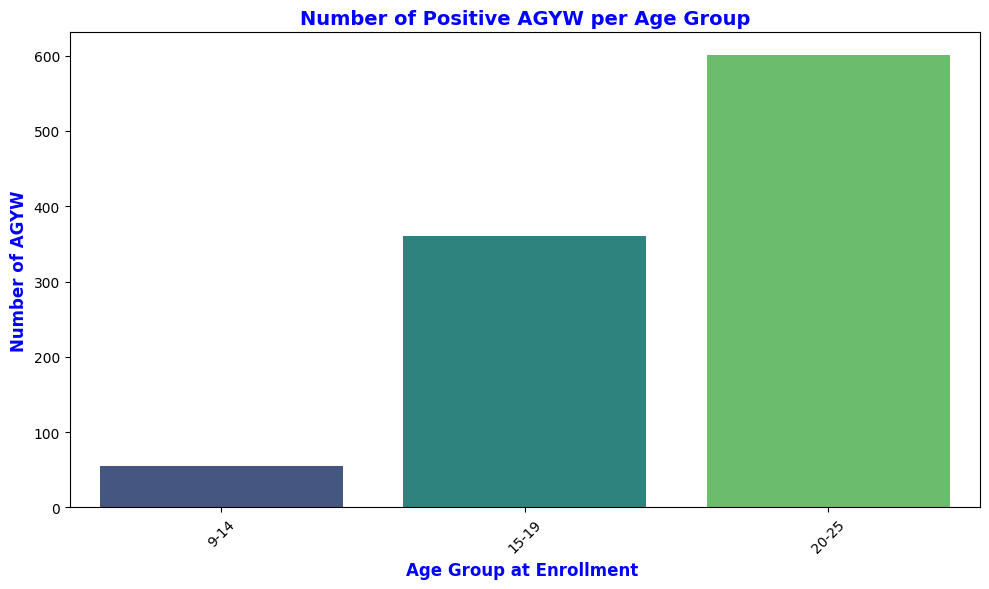

In [163]:
#Positive HIV per age of enrollment
#Figure
plt.figure(figsize=(10, 6))
#Countplot
sns.countplot(x='age_group', data=agyw_positive, palette='viridis')
#Set title and labels
plt.title('Number of Positive AGYW per Age Group', size=14, color='blue', weight='bold')
plt.xlabel('Age Group at Enrollment ', size=12, color='blue', weight='bold')
plt.ylabel('Number of AGYW', size=12, color='blue', weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2 (c). **Observation**

* Generally age group 20-25 years had  the highest number of AGYW enrolled with positive HIV test results

## 5.3 Multivariate Analysis


In [165]:
clean_df.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'age_of_household_head', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner', 'exit_status',
       'exit_reason', 'result', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions',
       'age_at_enrollment'],
      dtype='object')

3. What are the combined effects of a number of different factors (e.g., socio-economic, demographic, behavioral) on risk of HIV infection?
 a. How do number of people in the household, sexual behavior, and biomedical interventions affect HIV risk together?
 b. Which are the most relevant factors or sets of factors in association with HIV vulnerability?
 c. Which variables have maximum prediction power for determining HIV risk (outcome)?

In [182]:
mitigations = clean_df.groupby(['bio_medical',
                                'other_interventions'])['result'].value_counts()
mitigations

bio_medical  other_interventions  result  
0            0                    Negative      4267
                                  Positive         8
1            0                    Negative    422511
                                  Positive       819
             1                    Negative     27658
                                  Positive       192
Name: count, dtype: int64

In [183]:
mitigations_df = mitigations.reset_index(name='count')
mitigations_df.head()

,bio_medical,other_interventions,result,count
0,0,0,Negative,4267
1,0,0,Positive,8
2,1,0,Negative,422511
3,1,0,Positive,819
4,1,1,Negative,27658


In [188]:
# Using pd.crosstab to generate a cross-tabulation
mitigations_crosstab = pd.crosstab(
    index=[clean_df['bio_medical'],clean_df['other_interventions']], 
    columns=clean_df['result'], 
    margins=True,  # To get the totals
    margins_name="Total"
)

In [189]:
mitigations_crosstab

result                           Negative  Positive   Total
bio_medical other_interventions                            
0           0                        4267         8    4275
1           0                      422511       819  423330
            1                       27658       192   27850
Total                              454436      1019  455455

# 6.0 Modeling

## 6.1 Baseline Models with Class Imbalance

### 6.1.1 Logistic Regression(vanila)

In [219]:
# Logistic regression
#target and predictors
X = clean_df.drop(['result','date_of_birth','date_of_enrollment'], axis=1)
y = clean_df['result'].map({'Negative':0, 'Positive':1})

In [192]:
#train and test splits
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#separate categorical and numerical features
num_cols = X.select_dtypes(include=('int64', 'float64')).columns
cat_cols = X.select_dtypes(include='object').columns



In [194]:
#Pipeline 
numerical_transformer = Pipeline(steps=[
     
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
      
    ('ohe', OneHotEncoder(handle_unknown='ignore')) 
])

#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [ ]:
#Baseline model(vanila) as logistic regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [196]:
#Fit baseline model
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [197]:
#Make predictions
y_pred = lr_model.predict(X_test)

In [198]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 72.33%
Precision: 0.59%
Recall: 70.14%
F1 Score: 1.16%


In [199]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[65741 25139]
 [   63   148]]


### Observation
* Classifier is heavily biased towards dominant class(negative class)
* Model performance is very low despite setting class_weight to 'balanced'

### 6.1.2 Vanila Random forest model

In [203]:
#Random Forest model
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [204]:
#Fit RandomForest model
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [205]:
#Make predictions
y_pred_rf = rf.predict(X_test)

In [206]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f'Accuracy: {rf_accuracy*100:.2f}%')
print(f"Precision: {rf_precision*100:.2f}%")
print(f"Recall: {rf_recall*100:.2f}%")
print(f"F1 Score: {rf_f1*100:.2f}%")

Accuracy: 99.75%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


In [207]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[90863    17]
 [  211     0]]


### Observation

* 

### 6.1.3 XGBoost Model (Vanila)

In [247]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [248]:
#xgb model
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(random_state=42))
])

In [211]:
# Train XGBoost model
xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [212]:
# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)

In [213]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f'Accuracy: {xgb_accuracy*100:.2f}%')
print(f"Precision: {xgb_precision*100:.2f}%")
print(f"Recall: {xgb_recall*100:.2f}%")
print(f"F1 Score: {xgb_f1*100:.2f}%")

Accuracy: 99.77%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


## 6.2 Undersampling dominant class to match minority class

In [214]:
#balancing classes 
negative_class = clean_df[clean_df['result']=='Negative']
positive_class = clean_df[clean_df['result']=='Positive']

In [215]:
# Undersampling the majority negative class to match the size of the minority positive class
negative_class_undersampled = negative_class.sample(n=len(positive_class), random_state=42)

In [216]:
# Concatinate the undersampled negative class with the positive class
balanced_df = pd.concat([negative_class_undersampled, positive_class])

In [217]:
# Randomly shuffle the balanced dataset and reset index
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Separate predictor features and target
X_balanced = balanced_df.drop(columns=['result','date_of_birth','date_of_enrollment'])
y_balanced = balanced_df['result'].map({'Negative':0, 'Positive':1})

In [218]:
#train and test splits
X_train_balanced, X_test_balanced, y_train_balanced,y_test_balanced= train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=42)

### 6.2.1 Logistic Regression on balanced classes

In [235]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [236]:
# Fit model 
lr.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason'],
      dtype='object'))])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [237]:
#Make predictions
y_pred_balanced = lr.predict(X_test_balanced)

In [238]:
# confusion matrix for balanced dataset
cm_bal = confusion_matrix(y_test_balanced, y_pred_balanced)
print("Confusion Matrix:\n", cm_bal)

Confusion Matrix:
 [[136  66]
 [ 63 138]]


In [239]:
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
precision = precision_score(y_test_balanced, y_pred_balanced)
recall = recall_score(y_test_balanced, y_pred_balanced)
f1 = f1_score(y_test_balanced, y_pred_balanced)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 67.99%
Precision: 67.65%
Recall: 68.66%
F1 Score: 68.15%


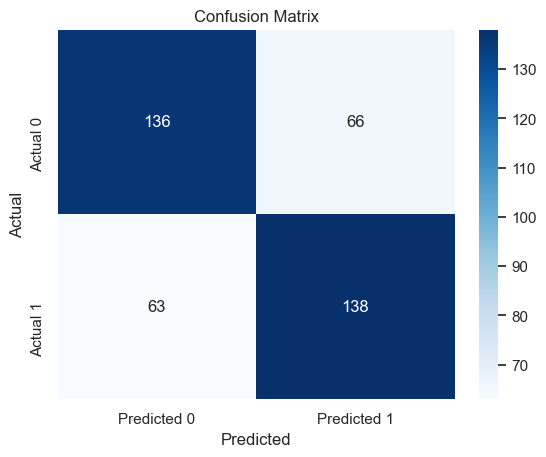

In [240]:
cm = confusion_matrix(y_test_balanced, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Observation

* There is general improvement on model performance compared with previous with class imbalance

### 6.2.2 Random Forest on balanced dataset

In [309]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [310]:
# Fit model on undersampled dataset
rf_model.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
       'are_both_parents_alive', 'ever_missed_full_day_food_in_4wks',
       'no_of_days_missed_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'last_test_result',
       'ever_had_sex', 'has_sexual_partner', 'age_of_last_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [311]:
#Make predictions
y_pred_rfbal = rf_model.predict(X_test_balanced)

In [312]:
# Evaluate the model
rfbal_accuracy = accuracy_score(y_test_balanced, y_pred_rfbal)
rfbal_precision = precision_score(y_test_balanced, y_pred_rfbal)
rfbal_recall = recall_score(y_test_balanced, y_pred_rfbal)
rfbal_f1 = f1_score(y_test_balanced, y_pred_rfbal)

print(f'Accuracy: {rfbal_accuracy*100:.2f}%')
print(f"Precision: {rfbal_precision*100:.2f}%")
print(f"Recall: {rfbal_recall*100:.2f}%")
print(f"F1 Score: {rfbal_f1*100:.2f}%")

Accuracy: 67.00%
Precision: 65.32%
Recall: 72.14%
F1 Score: 68.56%


### Observation

* 

### 6.2.3 XGBoost Model on balanced dataset

In [250]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [256]:
xgbbal = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

In [257]:
# Train XGBoost model
xgbbal.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_adults',
       'no_of_children', 'age_at_first_sexual_encounter', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'age_at_enrollment'],
      dtyp...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [258]:
# Predict and evaluate
y_pred_xgbbal = xgbbal.predict(X_test_balanced)

In [259]:
# Evaluate the model
xgbbal_accuracy = accuracy_score(y_test_balanced, y_pred_xgbbal)
xgbbal_precision = precision_score(y_test_balanced, y_pred_xgbbal)
xgbbal_recall = recall_score(y_test_balanced, y_pred_xgbbal)
xgbbal_f1 = f1_score(y_test_balanced, y_pred_xgbbal)

print(f'Accuracy: {xgbbal_accuracy*100:.2f}%')
print(f"Precision: {xgbbal_precision*100:.2f}%")
print(f"Recall: {xgbbal_recall*100:.2f}%")
print(f"F1 Score: {xgbbal_f1*100:.2f}%")

Accuracy: 67.49%
Precision: 66.83%
Recall: 69.15%
F1 Score: 67.97%


### 6.2.4 Best Model

Best model will be one that identifies all positives and minimizes false negatives, thereby crucial performance metrics are F1-score and Recall.

In [313]:
# Model Performance Comparison
print("Model Performance Comparison:")
print(f"Logistic Regression  Accuracy: {accuracy*100:.2f}% | Precision: {precision*100:.2f}% | Recall: {recall*100:.2f}% | F1 Score: {f1*100:.2f}%")
print(f"Random Forest Accuracy: {rfbal_accuracy*100:.2f}% | Precision: {rfbal_precision*100:.2f}% | Recall: {rfbal_recall*100:.2f}% | F1 Score: {rfbal_f1*100:.2f}%")
print(f"XGBoost Accuracy: {xgbbal_accuracy*100:.2f}% | Precision: {xgbbal_precision*100:.2f}% | Recall: {xgbbal_recall*100:.2f}% | F1 Score: {xgbbal_f1*100:.2f}%")

Model Performance Comparison:
Logistic Regression  Accuracy: 67.99% | Precision: 67.65% | Recall: 68.66% | F1 Score: 68.15%
Random Forest Accuracy: 67.00% | Precision: 65.32% | Recall: 72.14% | F1 Score: 68.56%
XGBoost Accuracy: 67.49% | Precision: 66.83% | Recall: 69.15% | F1 Score: 67.97%


###  Observation

* The best model for this specific objective (minimizing false negatives and identifying as many true positives as possible) is Random Forest. Random Forest stands out as the best model in this scenario due to its highest recall (which is important to capture all HIV positives) and the highest F1 score (which balances precision and recall).

## 6.3 Model Hyperparameter Tuning

### 6.3.1 XGBoost Model

In [289]:
X_train_scaled = preprocessor.fit_transform(X_train_balanced)
X_test_scaled = preprocessor.transform(X_test_balanced)

In [298]:
xgbbal = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


In [299]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size for each round
    'max_depth': [3, 5, 7, 9],  # Maximum depth of tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of hessian
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples for each tree
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features for each tree
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'scale_pos_weight': [1, 10, 50]  # Useful for imbalanced classes
}

In [300]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(xgbbal, param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

In [301]:
# Fit the model on training data
grid_search.fit(X_train_scaled, y_train_balanced)


Fitting 5 folds for each of 6912 candidates, totalling 34560 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [1, 10, 50],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='recall', verbose=1)

In [302]:
# Output the best parameters and recall score
print(f"Best hyperparameters for XGBoost: {grid_search.best_params_}")
print(f"Best recall score: {grid_search.best_score_:.2f}")

Best hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 0.7}
Best recall score: 1.00


In [303]:
# Get the best model and evaluate it on the test set
best_xgb = grid_search.best_estimator_
# y_pred_xgb = best_xgb_model.predict(X_test_balanced)

In [304]:
#Predict using the best model on the test set
y_predxgb = best_xgb.predict(X_test_scaled)

In [ ]:
# Evaluate the best model
best_accuracy = accuracy_score(y_test_balanced, y_predxgb)
best_precision = precision_score(y_test_balanced, y_predxgb)
best_recall = recall_score(y_test_balanced, y_predxgb)
best_f1 = f1_score(y_test_balanced, y_predxgb)

print(f'Tuned xgb Accuracy: {best_accuracy*100:.2f}%')
print(f"Tuned xgb Precision: {best_precision*100:.2f}%")
print(f"Tuned xgb Recall: {best_recall*100:.2f}%")
print(f"Tuned xgb F1 Score: {best_f1*100:.2f}%")

Accuracy: 49.88%
Precision: 49.88%
Recall: 100.00%
F1 Score: 66.56%


### 6.3.2 Random Forest Model

In [329]:
# Identify categorical columns
categorical_columns = X_balanced.select_dtypes(include=['object']).columns
num_columns = X_balanced.select_dtypes(exclude=['object']).columns

In [337]:
# Define the preprocessor
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
                        ('scaler', StandardScaler())  # Scale numerical features
        ]), num_columns) ,  # Apply to numeric columns only
        ('cat', Pipeline([
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), 
        categorical_columns)  # Apply to categorical columns only
    ])

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [338]:
X_scaledrf = rf_preprocessor.fit_transform(X_train_balanced)
X_testrf = rf_preprocessor.transform(X_test_balanced)

In [339]:
# Define the hyperparameter grid for Random Forest
param_gridrf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

In [340]:
# Set up GridSearchCV
grid_searchrf = GridSearchCV(rf_model, param_gridrf, cv=5, n_jobs=-1, verbose=2)

In [341]:
grid_searchrf.fit(X_scaledrf, y_train_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [342]:
#Get the best model after hyperparameter tuning
best_rf_model = grid_searchrf.best_estimator_

In [343]:
# Make predictions with the tuned model
y_pred_rf_best = best_rf_model.predict(X_testrf)

In [363]:
# Evaluate the tuned model
brfaccuracy = accuracy_score(y_test_balanced, y_pred_rf_best)
brfprecision = precision_score(y_test_balanced, y_pred_rf_best)
brfrecall = recall_score(y_test_balanced, y_pred_rf_best)
brff1 = f1_score(y_test_balanced, y_pred_rf_best)

# Print the results
print(f"Best Random Forest Model Accuracy: {brfaccuracy*100:.2f}%")
print(f"Best Random Forest Model Precision: {brfprecision*100:.2f}%")
print(f"Best Random Forest Model Recall: {brfrecall*100:.2f}%")
print(f"Best Random Forest Model F1 Score: {brff1*100:.2f}%")

Best Random Forest Model Accuracy: 67.49%
Best Random Forest Model Precision: 66.51%
Best Random Forest Model Recall: 70.15%
Best Random Forest Model F1 Score: 68.28%


### 6.3.3 Logistic Regression

In [352]:
# Define the preprocessor
log_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
                        ('scaler', StandardScaler())  # Scale numerical features
        ]), num_columns) ,  # Apply to numeric columns only
        ('cat', Pipeline([
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), 
        categorical_columns)  # Apply to categorical columns only
    ])

In [353]:
log_reg = LogisticRegression(class_weight='balanced')

In [354]:
X_scaled_logreg = log_preprocessor.fit_transform(X_train_balanced)
X_test_logreg = log_preprocessor.transform(X_test_balanced)

In [356]:
# Define the parameter grid for Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Use L2 regularization
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Max iterations for solver
}

In [357]:
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log, cv=5, scoring='accuracy', verbose=1)

In [358]:
# Fit the model on the training data
grid_search_log_reg.fit(X_scaled_logreg, y_train_balanced)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [359]:
# Get the best model
best_log_reg_model = grid_search_log_reg.best_estimator_

In [360]:
# Predict on the test set
y_pred_log_reg = best_log_reg_model.predict(X_test_logreg)

In [ ]:
log_accuracy = accuracy_score(y_test_balanced, y_pred_log_reg)
log_precision = precision_score(y_test_balanced, y_pred_log_reg)
log_recall = recall_score(y_test_balanced, y_pred_log_reg)
log_f1 = f1_score(y_test_balanced, y_pred_log_reg)

# Print results
print(f"Logistic Regression - Accuracy: {log_accuracy*100:.2f}%")
print(f"Logistic Regression -Precision: {log_precision*100:.2f}%")
print(f"Logistic Regression -Recall: {log_recall*100:.2f}%")
print(f"Logistic Regression -F1 Score: {log_f1*100:.2f}%")

Logistic Regression - Accuracy: 67.25%
Precision: 67.00%
Recall: 67.66%
F1 Score: 67.33%


In [364]:
# Model Performance Comparison
print("Tuned Model Performance Comparison:")
print(f"Logistic Regression  Accuracy: {log_accuracy*100:.2f}% | Precision: {log_precision*100:.2f}% | Recall: {log_recall*100:.2f}% | F1 Score: {log_f1*100:.2f}%")
print(f"Random Forest Accuracy: {brfaccuracy*100:.2f}% | Precision: {brfprecision*100:.2f}% | Recall: {brfrecall*100:.2f}% | F1 Score: {brff1*100:.2f}%")
print(f"XGBoost Accuracy: {best_accuracy*100:.2f}% | Precision: {best_precision*100:.2f}% | Recall: {best_recall*100:.2f}% | F1 Score: {best_f1*100:.2f}%")

Tuned Model Performance Comparison:
Logistic Regression  Accuracy: 67.25% | Precision: 67.00% | Recall: 67.66% | F1 Score: 67.33%
Random Forest Accuracy: 67.49% | Precision: 66.51% | Recall: 70.15% | F1 Score: 68.28%
XGBoost Accuracy: 49.88% | Precision: 49.88% | Recall: 100.00% | F1 Score: 66.56%


### Insights
* Random Forest seems to be the best overall performer when considering a balance between recall and other metrics like precision and F1 score.
    * Aligns with the objective of minimizing false negative HIV detections

* XGBoost is the best for recall if minimizing false negatives is the absolute priority, but its low accuracy may pose a challenge.

